In [1]:
import numpy as np
import pandas as pd

In [ ]:
occupancy_grid = pd.read_csv('/home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/map02/OccupancyGrid3D.csv', header=None)
occupancy_grid.shape

In [11]:
from PIL import Image

pgm_file_path = '/home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/map02/occupancy.pgm'
img = Image.open(pgm_file_path)
img.size

(1040, 640)

Original image size: (1040, 640)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


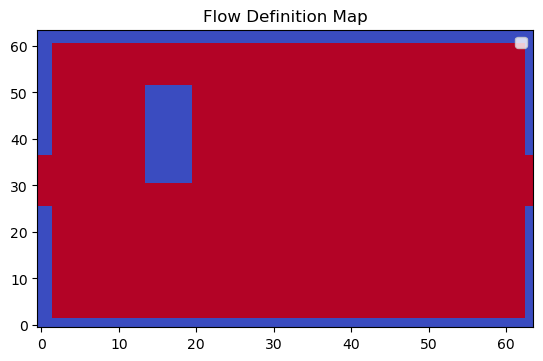

In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

pgm_file_path = '/home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/map02/occupancy.pgm'
img = Image.open(pgm_file_path)

original_size = img.size
print(f'Original image size: {original_size}') 

img_resized = img.resize((64, 64), Image.NEAREST)

flow_map = np.array(img_resized)

plt.imshow(flow_map, cmap='coolwarm', origin='lower', aspect=6/10)
plt.title('Flow Definition Map')
plt.legend()
plt.show()

In [23]:
from scipy.ndimage import distance_transform_edt

# SDF Map
def create_sdf_map(flow_map):
    sdf_map = distance_transform_edt(flow_map != 0)
    
    sdf_map[flow_map == 0] = -sdf_map[flow_map == 0]
    
    return sdf_map

# Inverse Distance Map 
def create_inverse_distance_map(source_coords, grid_size=64):
    grid_x, grid_y = np.meshgrid(np.linspace(0, 10, grid_size), np.linspace(0, 6, grid_size))
    distances = np.sqrt((grid_x - source_coords[0])**2 + (grid_y - source_coords[1])**2)
    inverse_distance_map = 1.0 / (distances + 1e-6)
    
    return inverse_distance_map

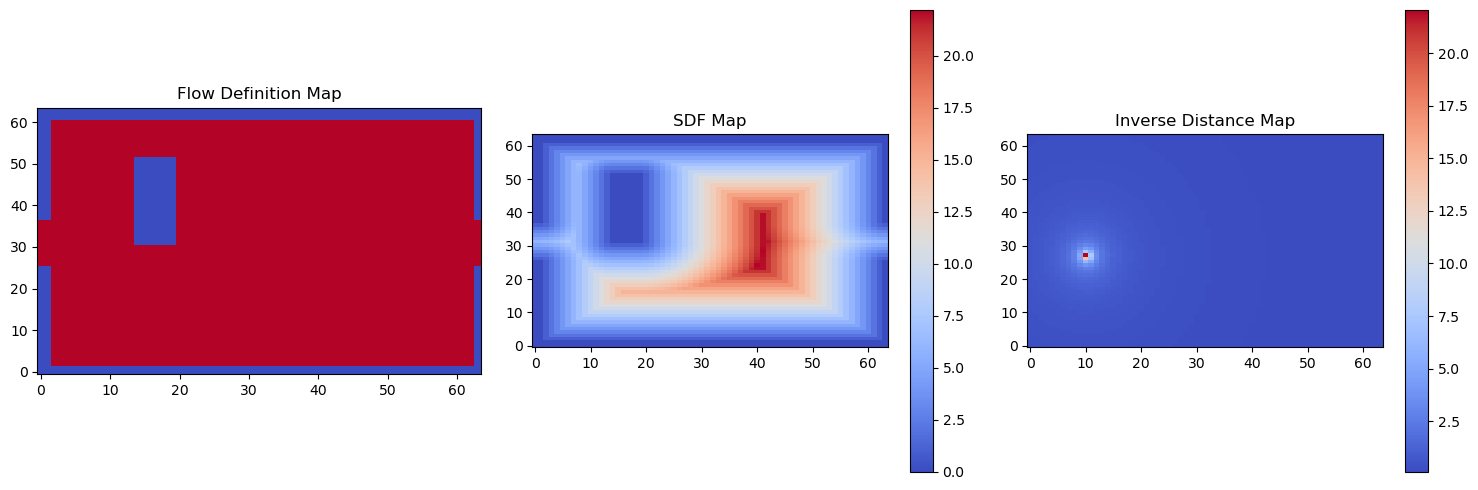

In [22]:
# SDF와 Inverse Distance Map visualization
def visualize_maps(flow_map, sdf_map, inverse_distance_map):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Flow Definition Map
    ax[0].imshow(flow_map, cmap='coolwarm', origin='lower', aspect=6/10)
    ax[0].set_title('Flow Definition Map')

    # SDF Map
    sdf_plot = ax[1].imshow(sdf_map, cmap='coolwarm', origin='lower', aspect=6/10)
    ax[1].set_title('SDF Map')
    fig.colorbar(sdf_plot, ax=ax[1])

    # Inverse Distance Map
    inv_dist_plot = ax[2].imshow(inverse_distance_map, cmap='coolwarm', origin='lower', aspect=6/10)
    ax[2].set_title('Inverse Distance Map')
    fig.colorbar(inv_dist_plot, ax=ax[2])

    plt.tight_layout()
    plt.show()


sdf_map = create_sdf_map(flow_map)
source_coords = [1.62, 2.54] 
inverse_distance_map = create_inverse_distance_map(source_coords)

visualize_maps(flow_map, sdf_map, inverse_distance_map)

Maps saved in /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map11 as flow_definition_map.npy, sdf_map.npy, and inverse_distance_map.npy


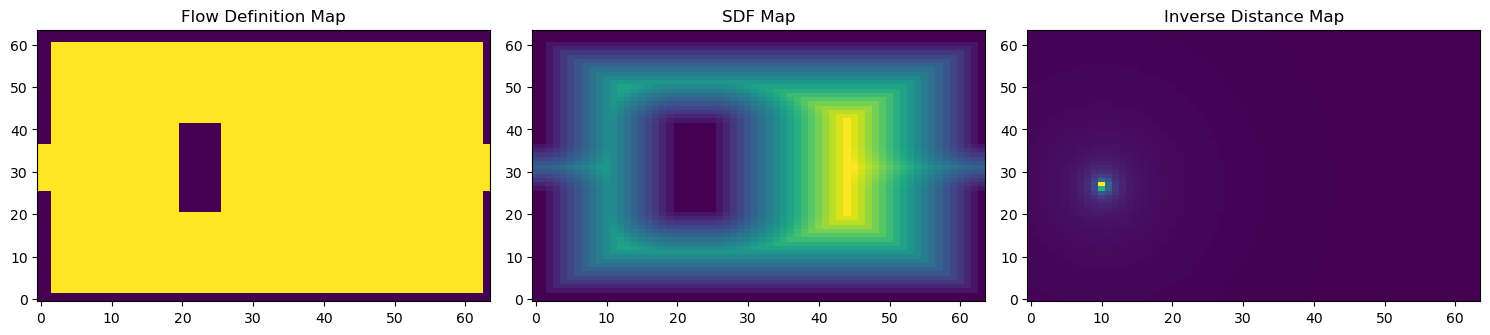

In [155]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt
import os


def process_and_visualize_maps(pgm_file_path, source_coords, grid_size=64):
    output_dir = os.path.dirname(pgm_file_path)
    
    # PGM file to Flow Definition Map
    img = Image.open(pgm_file_path)
    img_resized = img.resize((grid_size, grid_size), Image.NEAREST)
    flow_map = np.array(img_resized)

    # SDF Map 
    def create_sdf_map(flow_map):
        sdf_map = distance_transform_edt(flow_map != 0)
        sdf_map[flow_map == 0] = -sdf_map[flow_map == 0]
        return sdf_map

    # Inverse Distance to Source Map
    def create_inverse_distance_map(source_coords, grid_size=64):
        grid_x, grid_y = np.meshgrid(np.linspace(0, 10, grid_size), np.linspace(0, 6, grid_size))
        distances = np.sqrt((grid_x - source_coords[0])**2 + (grid_y - source_coords[1])**2)
        inverse_distance_map = 1.0 / (distances + 1e-6)  
        return inverse_distance_map
    
    sdf_map = create_sdf_map(flow_map)
    inverse_distance_map = create_inverse_distance_map(source_coords)

    # Save maps
    np.save(os.path.join(output_dir, 'flow_definition_map.npy'), flow_map)
    np.save(os.path.join(output_dir, 'sdf_map.npy'), sdf_map)
    np.save(os.path.join(output_dir, 'inverse_distance_map.npy'), inverse_distance_map)
    
    print(f"Maps saved in {output_dir} as flow_definition_map.npy, sdf_map.npy, and inverse_distance_map.npy")

    # Visualization
    def visualize_maps(flow_map, sdf_map, inverse_distance_map):
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))

        # Flow Definition Map
        ax[0].imshow(flow_map, cmap='viridis', origin='lower', aspect=6/10)
        ax[0].set_title('Flow Definition Map')

        # SDF Map
        sdf_plot = ax[1].imshow(sdf_map, cmap='viridis', origin='lower', aspect=6/10)
        ax[1].set_title('SDF Map')
        # fig.colorbar(sdf_plot, ax=ax[1], fraction=0.046, pad=0.04, shrink=0.9, aspect=20)

        # Inverse Distance Map
        inv_dist_plot = ax[2].imshow(inverse_distance_map, cmap='viridis', origin='lower', aspect=6/10)
        ax[2].set_title('Inverse Distance Map')
        # fig.colorbar(inv_dist_plot, ax=ax[2], fraction=0.046, pad=0.04, shrink=0.9, aspect=20) 
        
        plt.tight_layout()
        plt.show()

    sdf_map = create_sdf_map(flow_map)
    inverse_distance_map = create_inverse_distance_map(source_coords)

    visualize_maps(flow_map, sdf_map, inverse_distance_map)


pgm_file_path = '/home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map11/occupancy.pgm'
source_coords = [7.28, 5.13]
process_and_visualize_maps(pgm_file_path, source_coords)

In [36]:
output_dir = '/home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/map02'

flow_map_path = os.path.join(output_dir, 'flow_definition_map.npy')
sdf_map_path = os.path.join(output_dir, 'sdf_map.npy')
inverse_distance_map_path = os.path.join(output_dir, 'inverse_distance_map.npy')

flow_map = np.load(flow_map_path)
sdf_map = np.load(sdf_map_path)
inverse_distance_map = np.load(inverse_distance_map_path)

flow_map_shape = flow_map.shape
sdf_map_shape = sdf_map.shape
inverse_distance_map_shape = inverse_distance_map.shape

flow_map_shape, sdf_map_shape, inverse_distance_map_shape

((64, 64), (64, 64), (64, 64))

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import distance_transform_edt
import os

# 시뮬레이션 소스 좌표 설정 (sim1 ~ sim20)
source_coords_list = [
    [1.62, 2.54], [7.28, 5.13], [6.14, 1.65], [2.28, 0.97], [3.7, 4.1],
    [0.47, 0.86], [0.07, 4.33], [4.36, 1.65], [1.2, 1.22], [2.37, 1.13],
    [6.38, 3.66], [5.55, 2.03], [5.57, 4.53], [7.88, 2.06], [9.17, 0.86],
    [2.74, 0.69], [4.17, 1.08], [3.31, 5.85], [8.0, 0.96], [9.63, 1.26]
]

def process_and_visualize_maps(pgm_file_path, source_coords, sim_num, grid_size=64):
    output_dir = os.path.join(os.path.dirname(pgm_file_path), f'sim{sim_num}')
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # PGM 파일에서 Flow Definition Map 생성
    img = Image.open(pgm_file_path)
    img_resized = img.resize((grid_size, grid_size), Image.NEAREST)
    flow_map = np.array(img_resized)

    # SDF Map 생성
    def create_sdf_map(flow_map):
        sdf_map = distance_transform_edt(flow_map != 0)
        sdf_map[flow_map == 0] = -sdf_map[flow_map == 0]
        return sdf_map

    # Inverse Distance to Source Map 생성
    def create_inverse_distance_map(source_coords, grid_size=64):
        grid_x, grid_y = np.meshgrid(np.linspace(0, 10, grid_size), np.linspace(0, 6, grid_size))
        distances = np.sqrt((grid_x - source_coords[0])**2 + (grid_y - source_coords[1])**2)
        inverse_distance_map = 1.0 / (distances + 1e-6)
        return inverse_distance_map
    
    sdf_map = create_sdf_map(flow_map)
    inverse_distance_map = create_inverse_distance_map(source_coords)

    # 넘파이 파일 저장
    np.save(os.path.join(output_dir, 'flow_definition_map.npy'), flow_map)
    np.save(os.path.join(output_dir, 'sdf_map.npy'), sdf_map)
    np.save(os.path.join(output_dir, 'inverse_distance_map.npy'), inverse_distance_map)
    
    print(f"Sim{sim_num}의 넘파이 파일이 {output_dir}에 저장되었습니다.")

    # 맵 시각화
    def visualize_maps(flow_map, sdf_map, inverse_distance_map):
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))

        # Flow Definition Map
        ax[0].imshow(flow_map, cmap='viridis', origin='lower', aspect=6/10)
        ax[0].set_title('Flow Definition Map')

        # SDF Map
        sdf_plot = ax[1].imshow(sdf_map, cmap='viridis', origin='lower', aspect=6/10)
        ax[1].set_title('SDF Map')

        # Inverse Distance Map
        inv_dist_plot = ax[2].imshow(inverse_distance_map, cmap='viridis', origin='lower', aspect=6/10)
        ax[2].set_title('Inverse Distance Map')

        plt.tight_layout()
        plt.show()

    visualize_maps(flow_map, sdf_map, inverse_distance_map)

Sim1의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim1에 저장되었습니다.


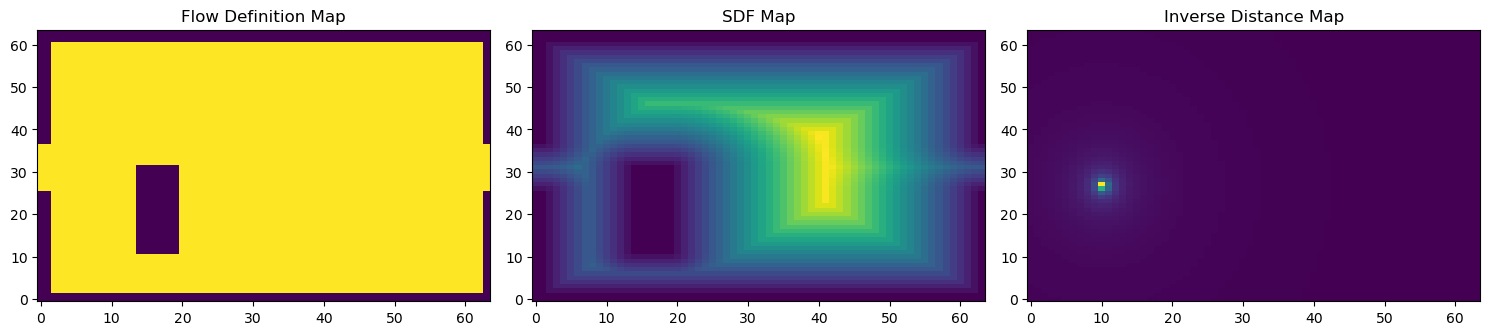

Sim2의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim2에 저장되었습니다.


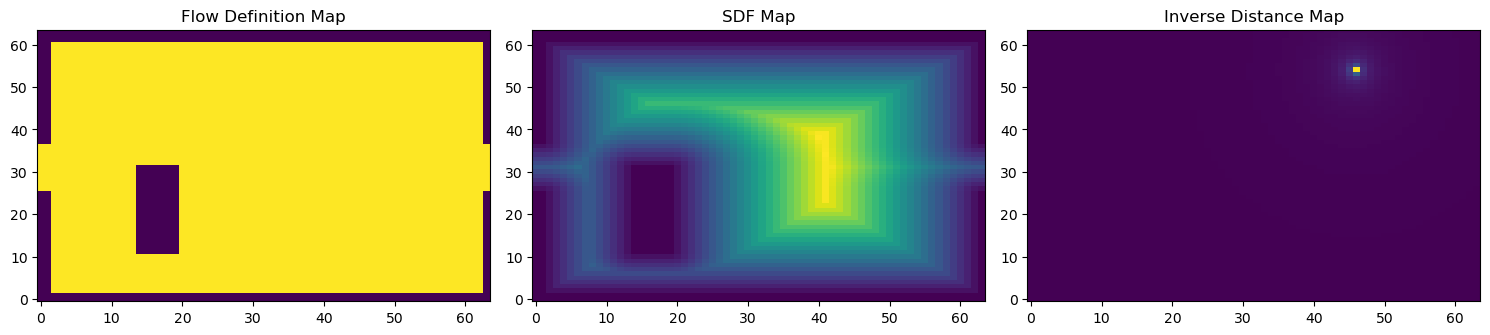

Sim3의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim3에 저장되었습니다.


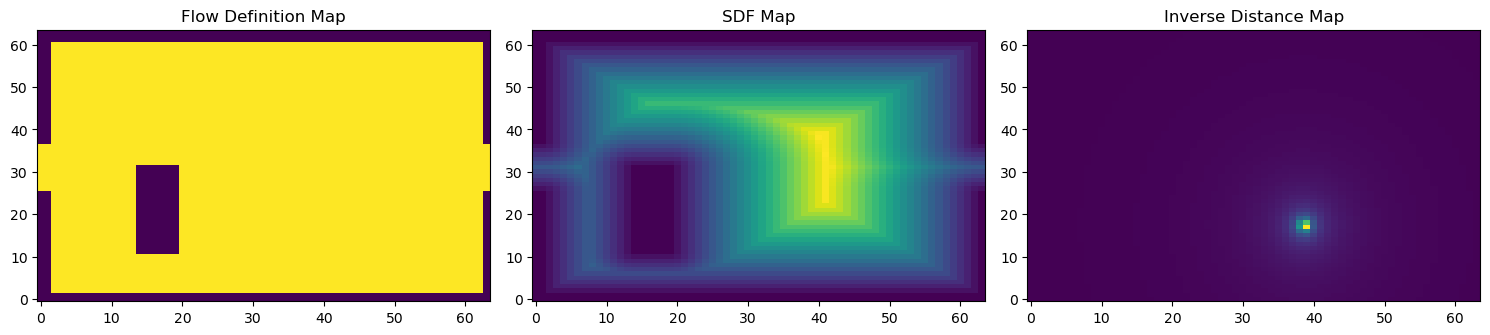

Sim4의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim4에 저장되었습니다.


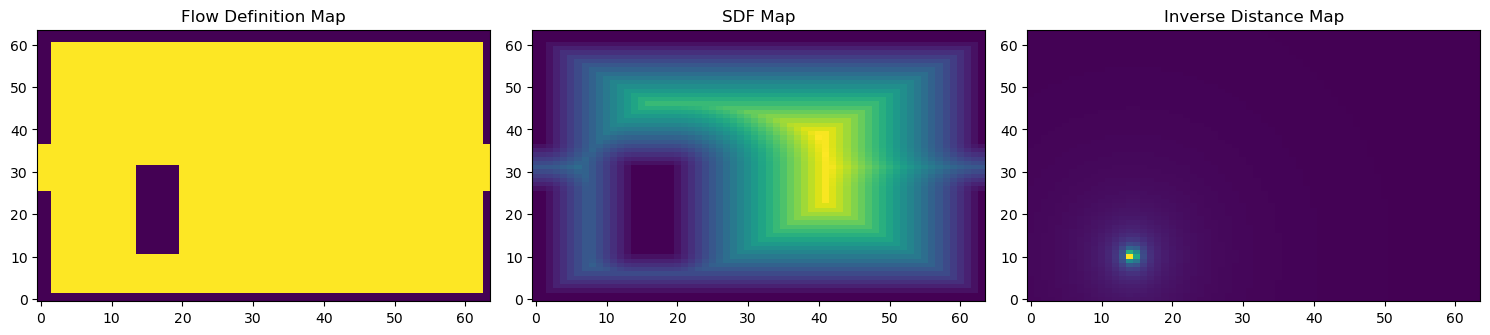

Sim5의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim5에 저장되었습니다.


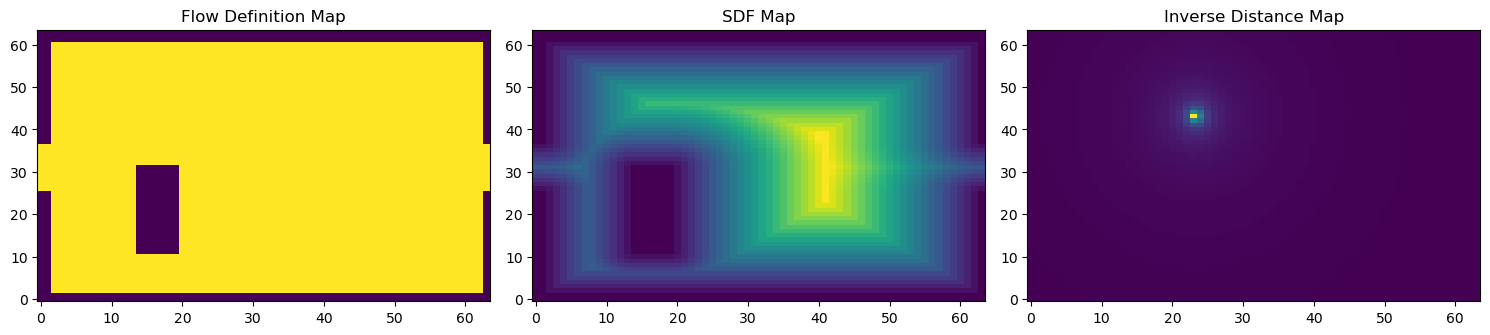

Sim6의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim6에 저장되었습니다.


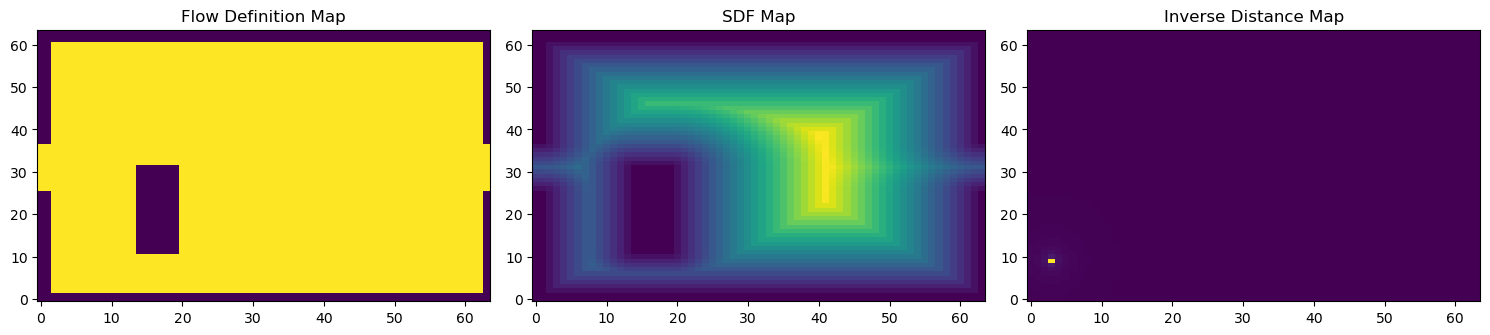

Sim7의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim7에 저장되었습니다.


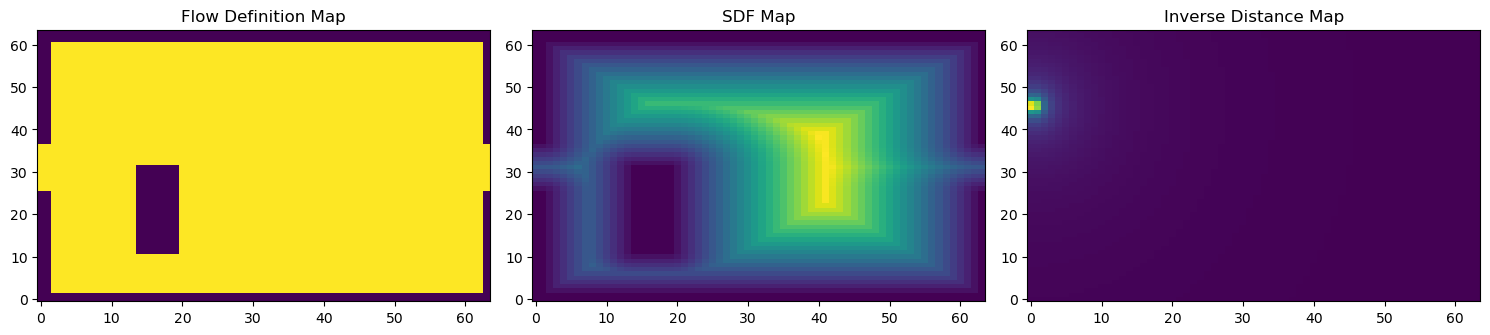

Sim8의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim8에 저장되었습니다.


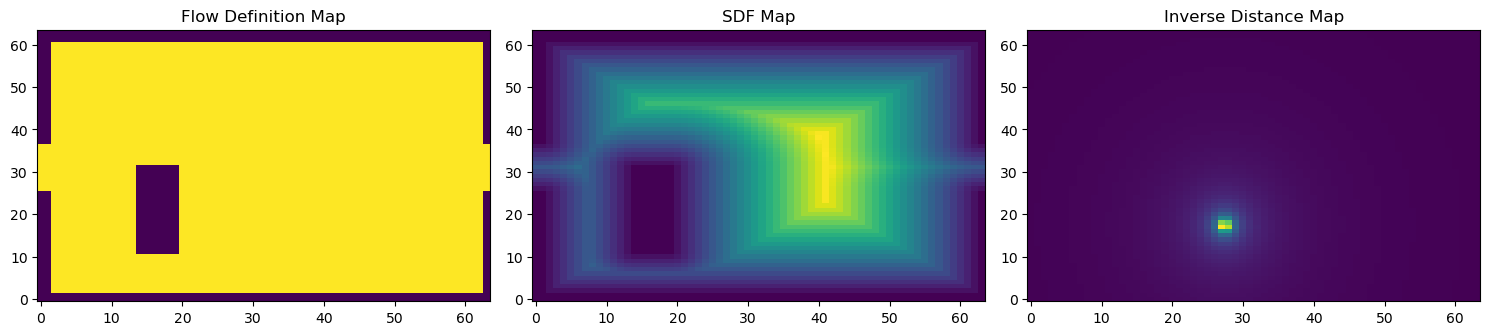

Sim9의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim9에 저장되었습니다.


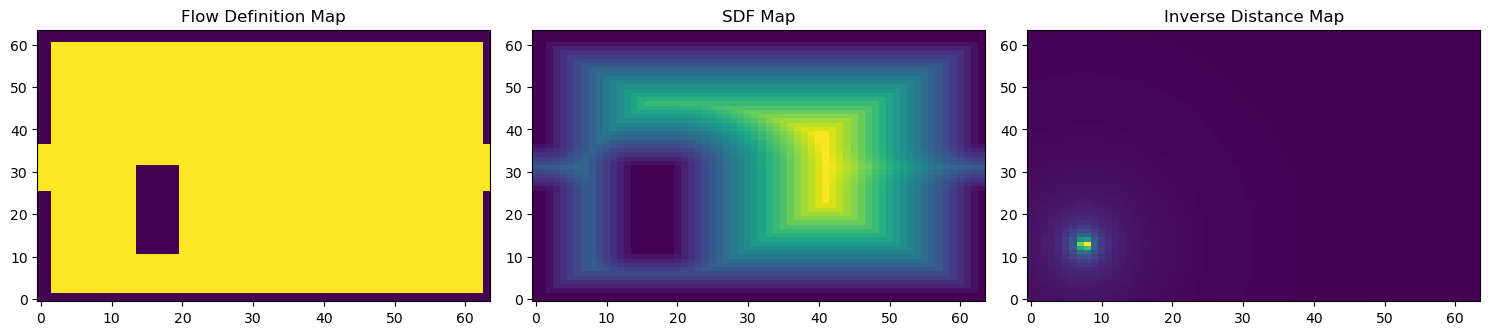

Sim10의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim10에 저장되었습니다.


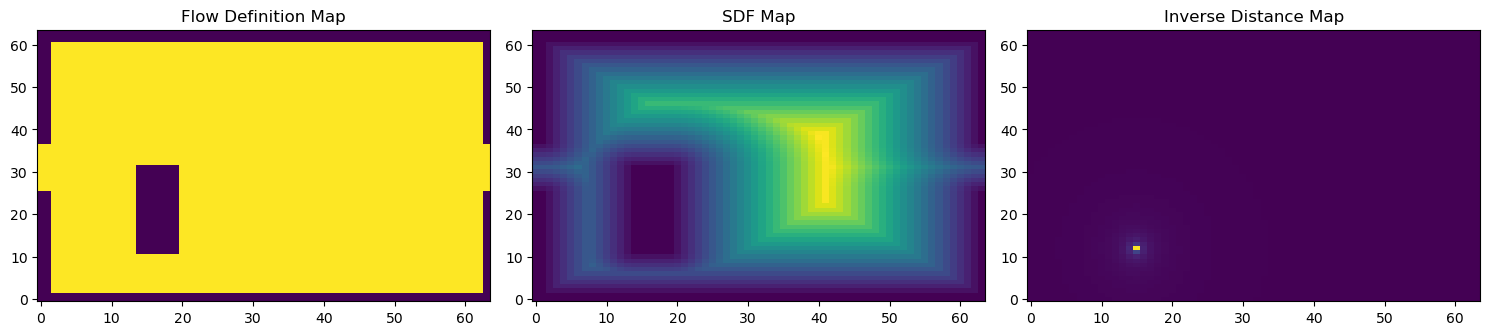

Sim11의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim11에 저장되었습니다.


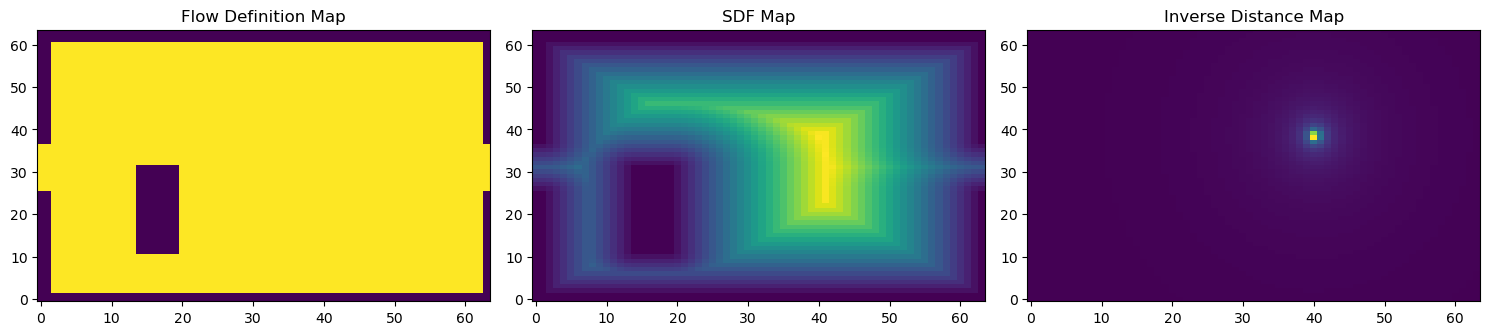

Sim12의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim12에 저장되었습니다.


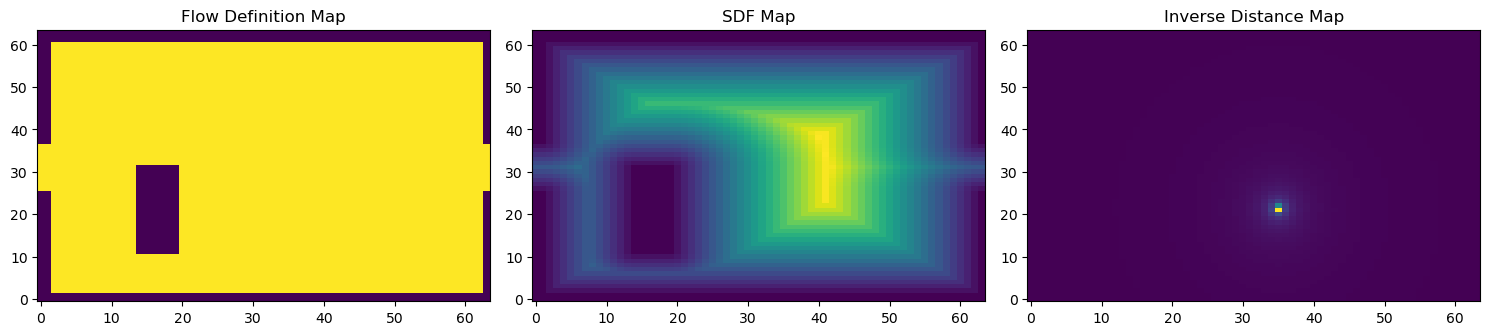

Sim13의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim13에 저장되었습니다.


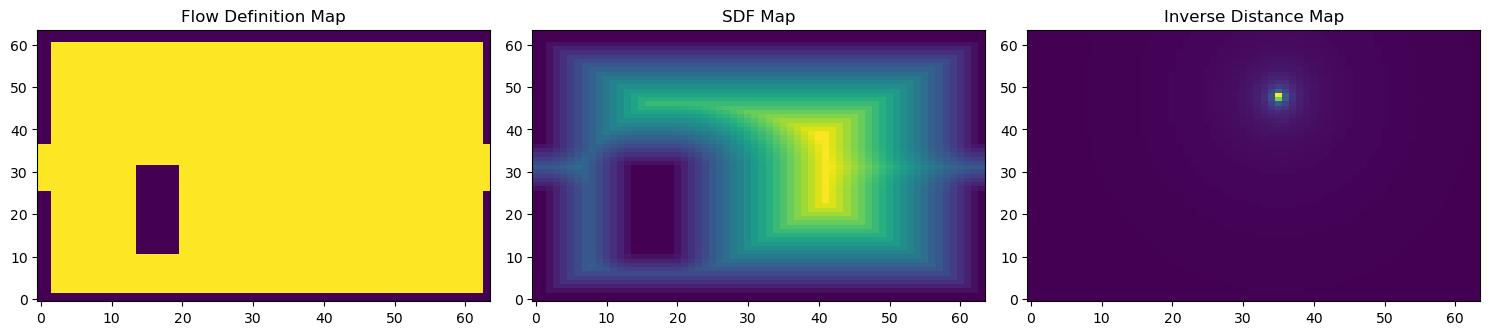

Sim14의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim14에 저장되었습니다.


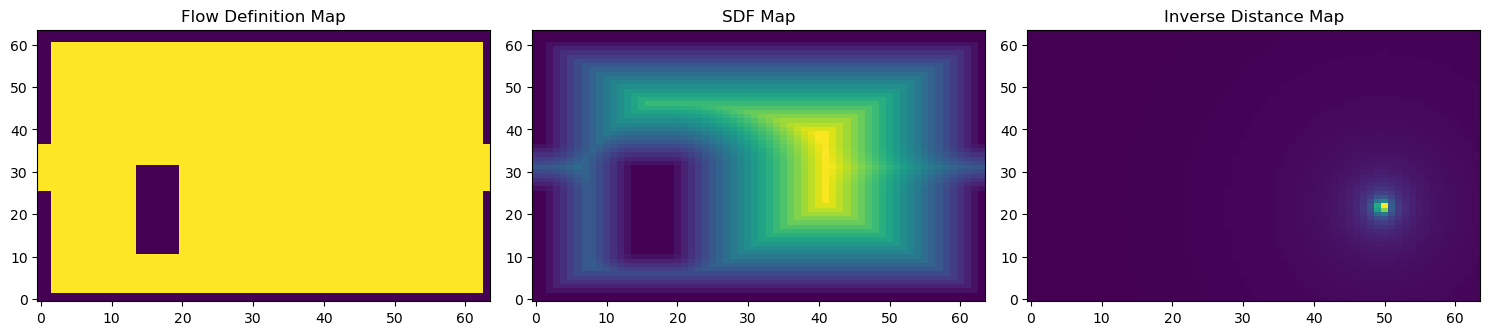

Sim15의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim15에 저장되었습니다.


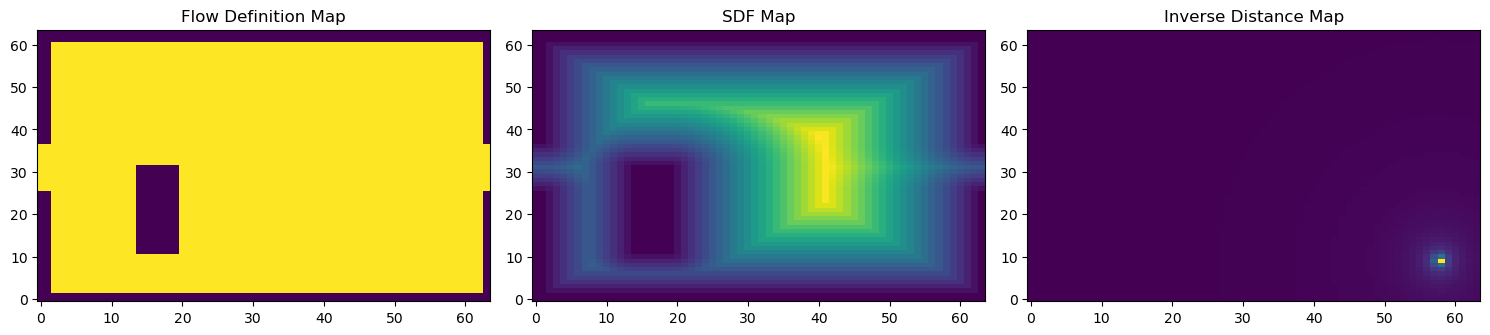

Sim16의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim16에 저장되었습니다.


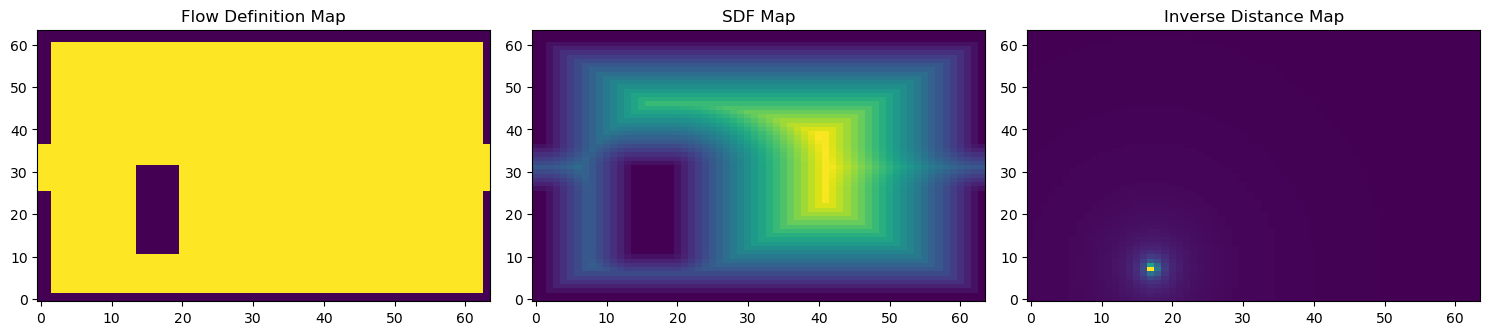

Sim17의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim17에 저장되었습니다.


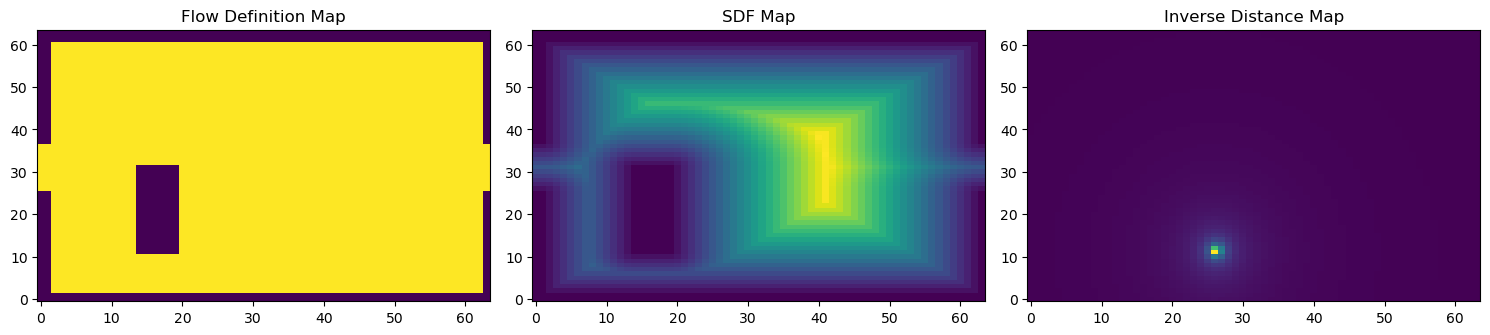

Sim18의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim18에 저장되었습니다.


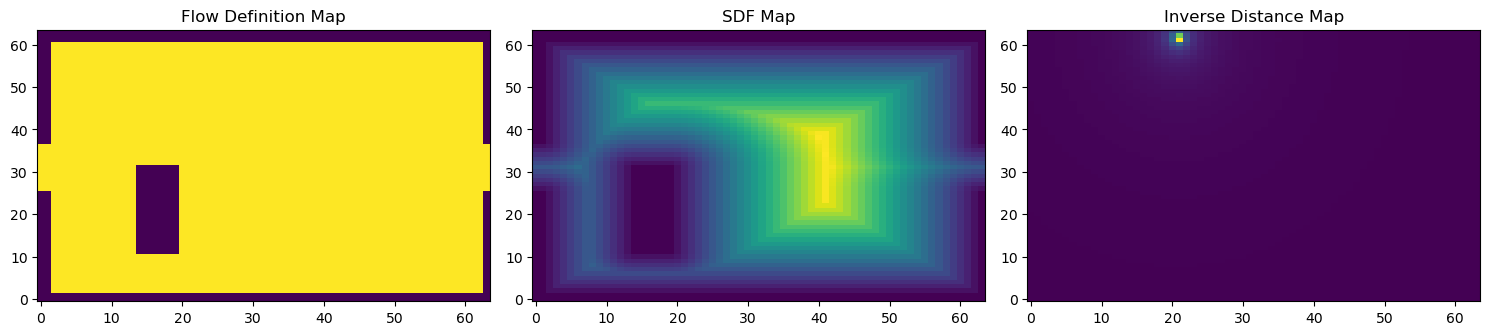

Sim19의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim19에 저장되었습니다.


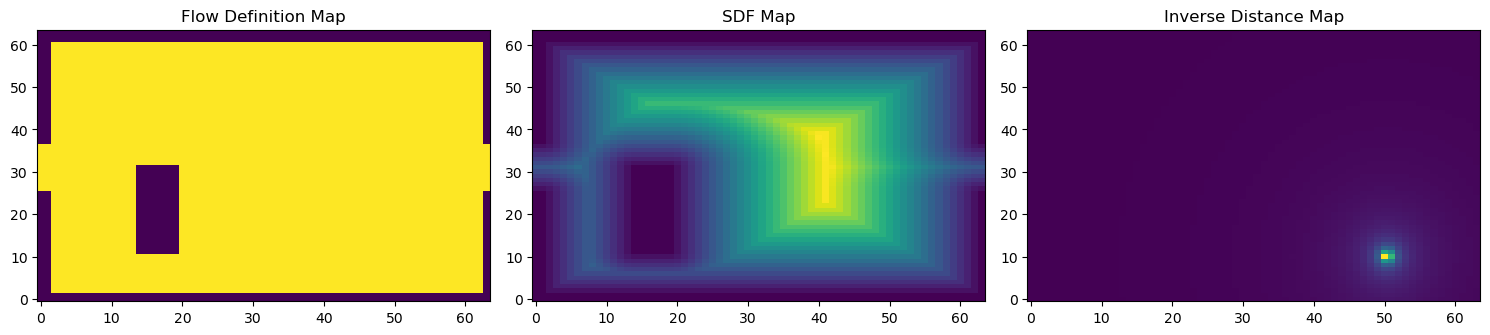

Sim20의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/sim20에 저장되었습니다.


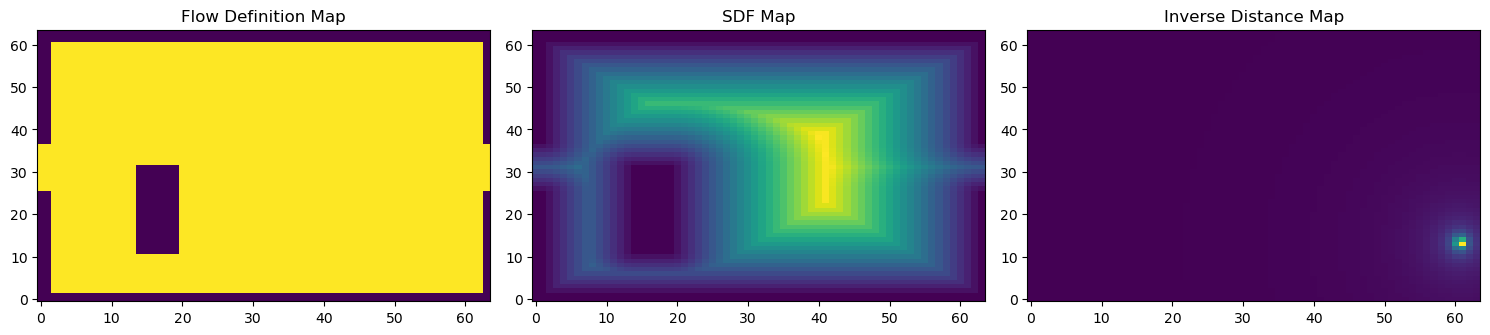

In [5]:
pgm_file_path = '/home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map18/occupancy.pgm'

# 자동화 처리
for sim_num, source_coords in enumerate(source_coords_list, start=1):
    process_and_visualize_maps(pgm_file_path, source_coords, sim_num)

In [ ]:
pgm_file_path = '/home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map93/occupancy.pgm'

# 자동화 처리
for sim_num, source_coords in enumerate(source_coords_list, start=1):
    process_and_visualize_maps(pgm_file_path, source_coords, sim_num)

Sim1의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim1에 저장되었습니다.


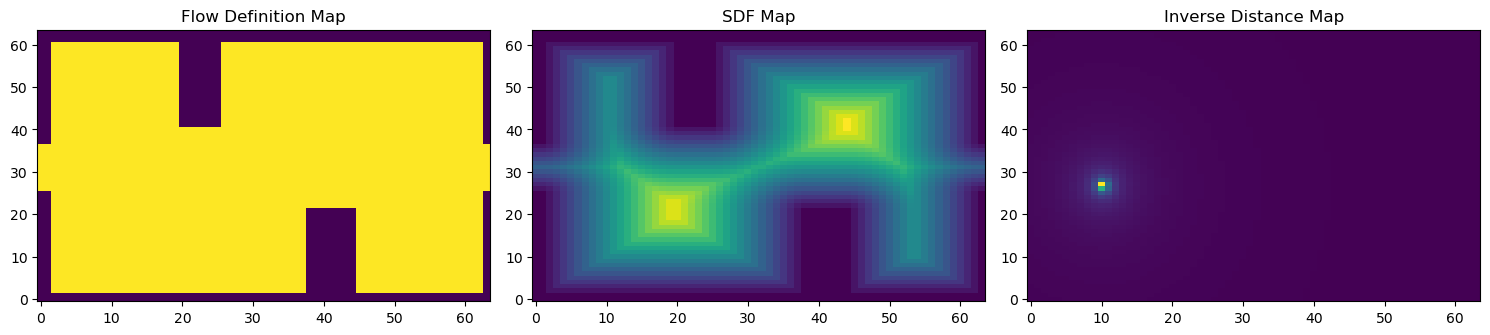

Sim2의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim2에 저장되었습니다.


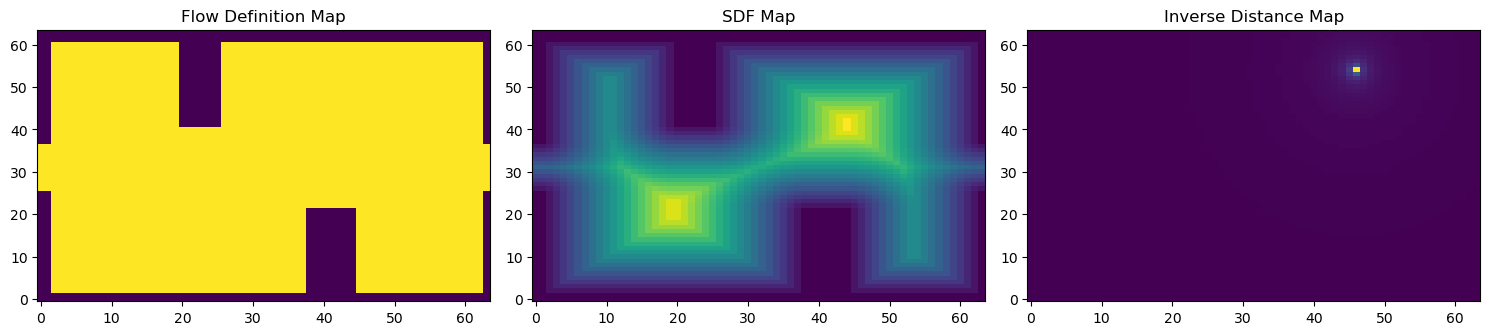

Sim3의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim3에 저장되었습니다.


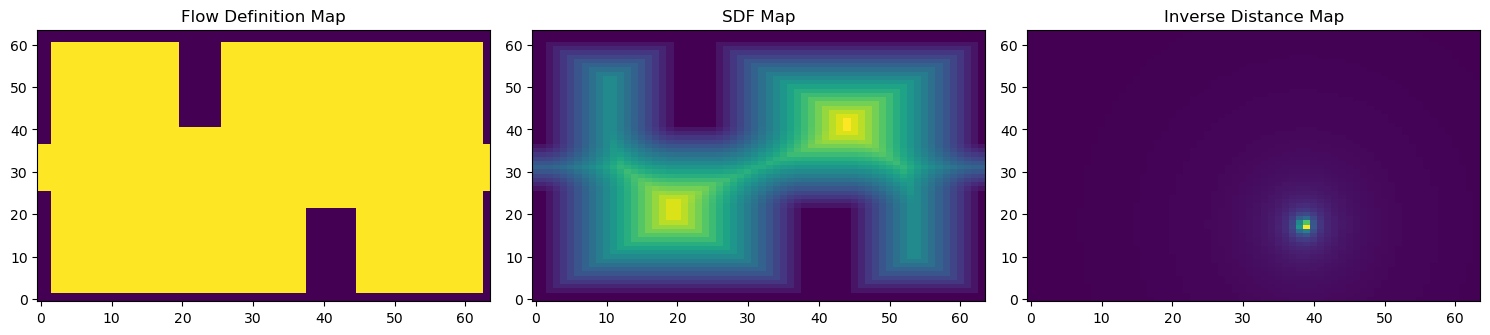

Sim4의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim4에 저장되었습니다.


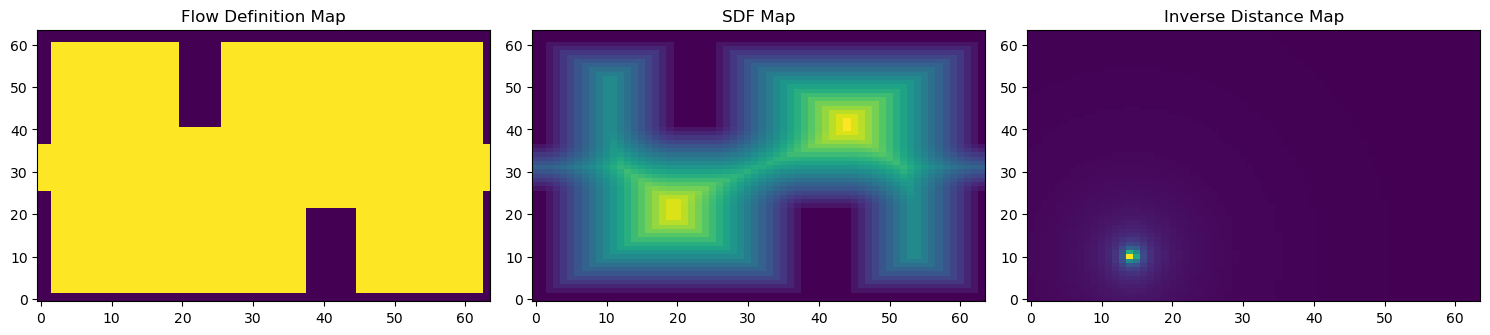

Sim5의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim5에 저장되었습니다.


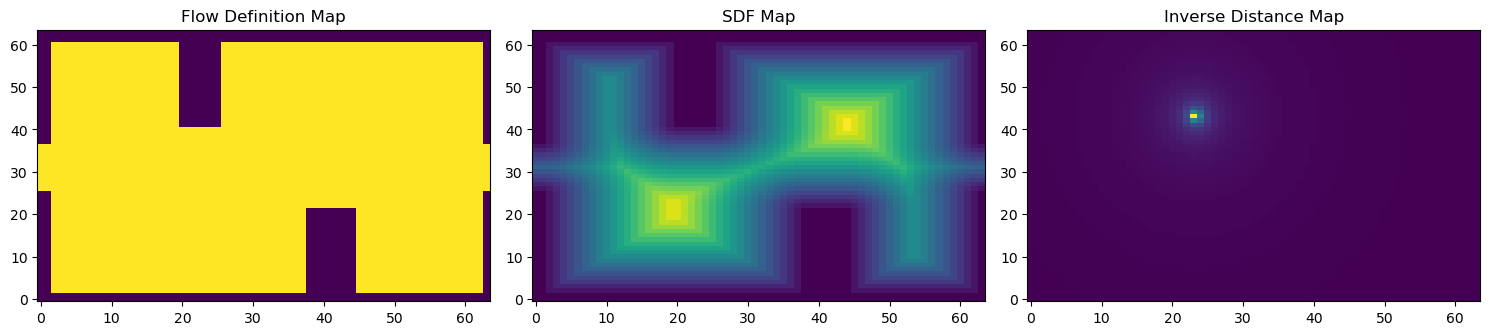

Sim6의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim6에 저장되었습니다.


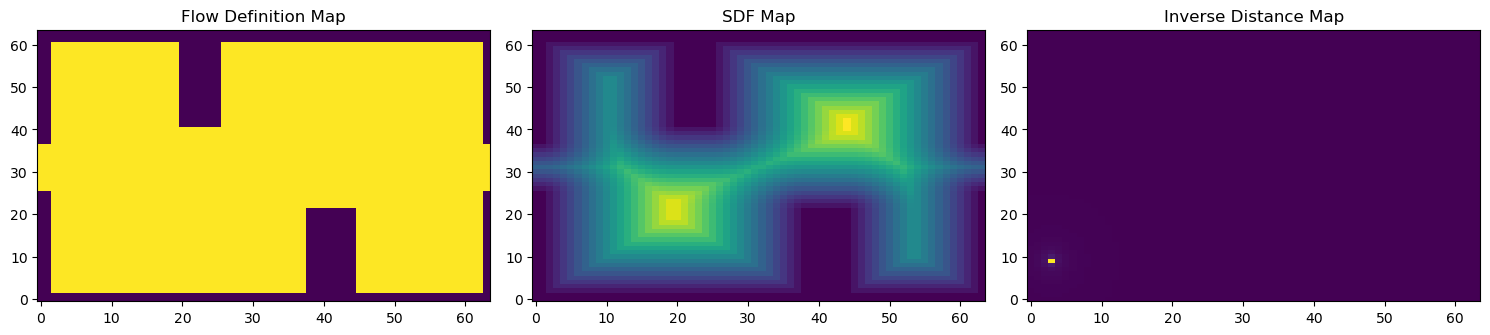

Sim7의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim7에 저장되었습니다.


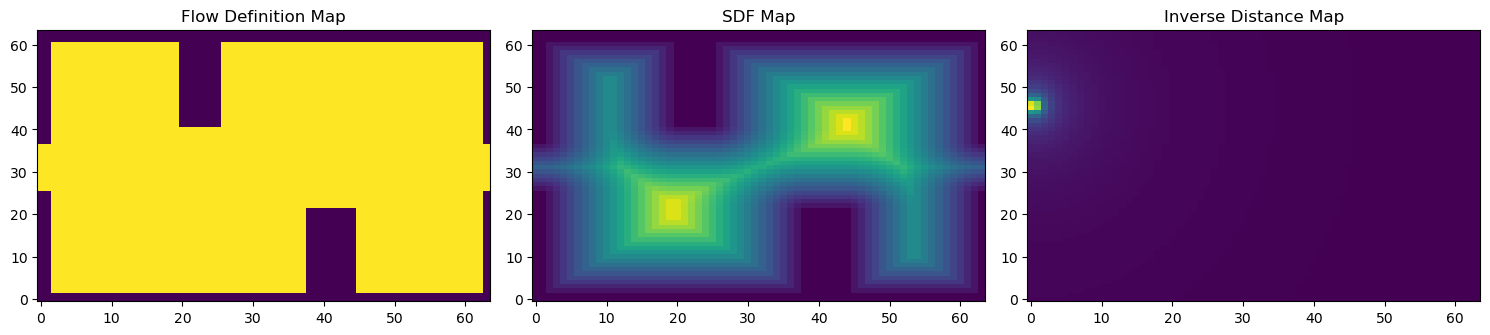

Sim8의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim8에 저장되었습니다.


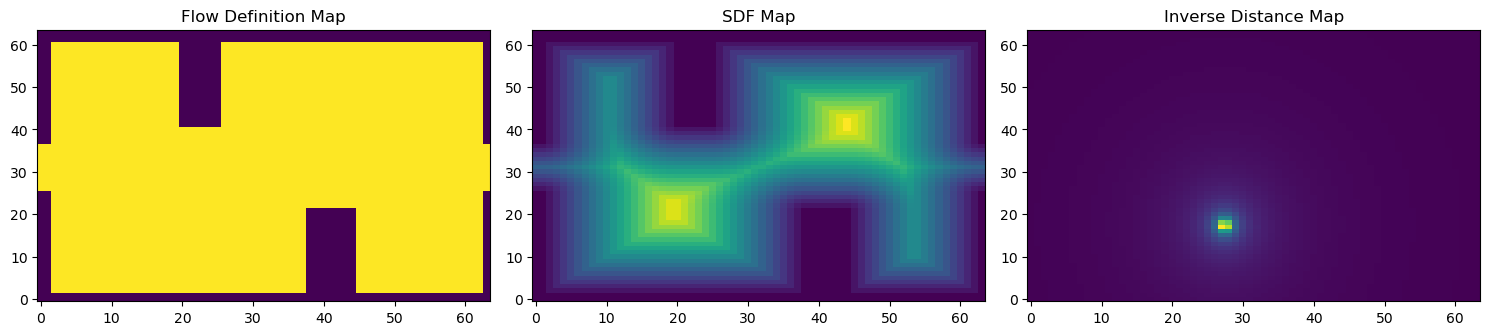

Sim9의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim9에 저장되었습니다.


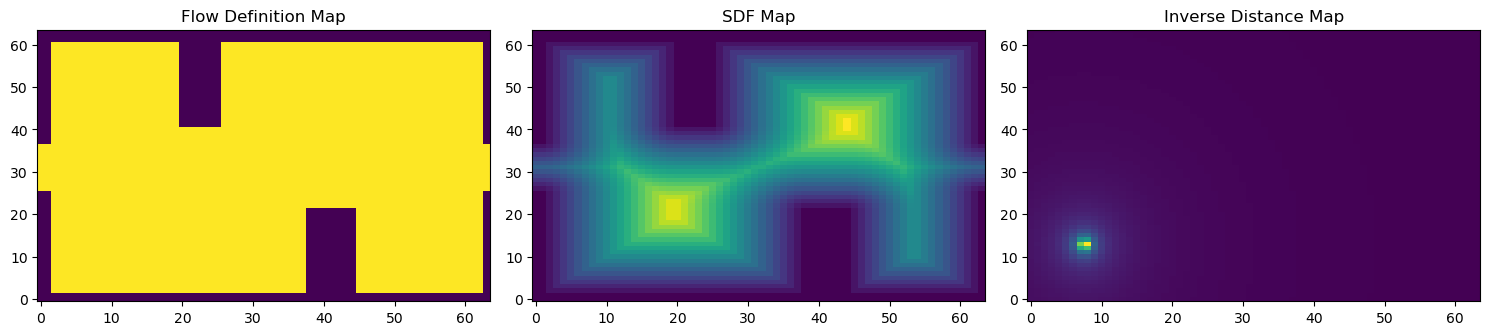

Sim10의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim10에 저장되었습니다.


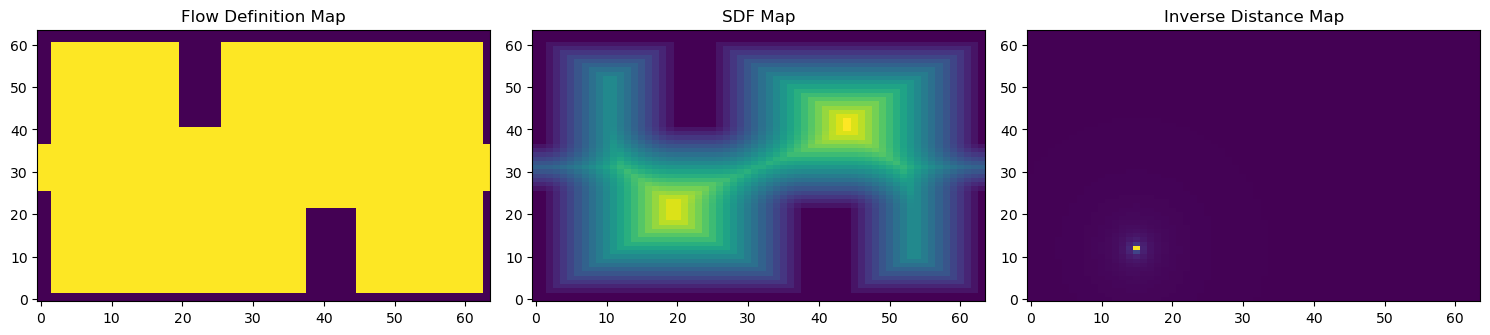

Sim11의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim11에 저장되었습니다.


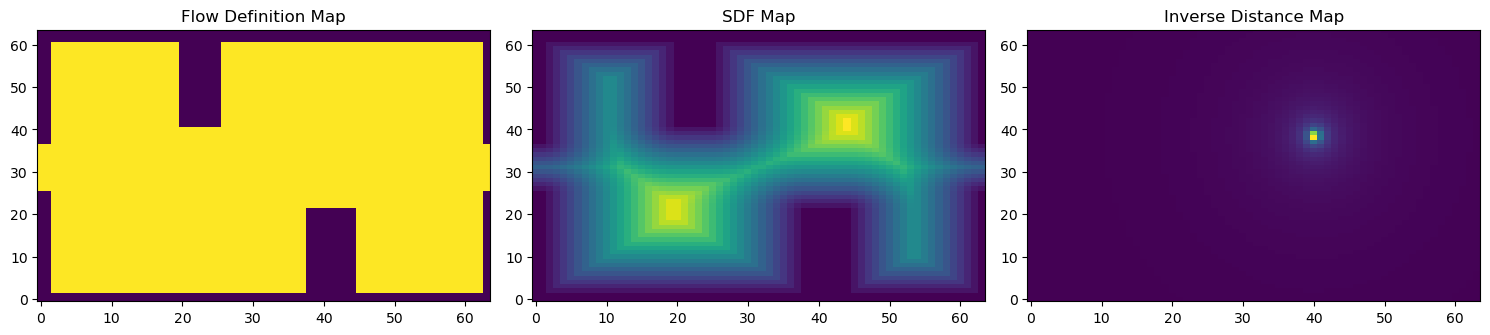

Sim12의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim12에 저장되었습니다.


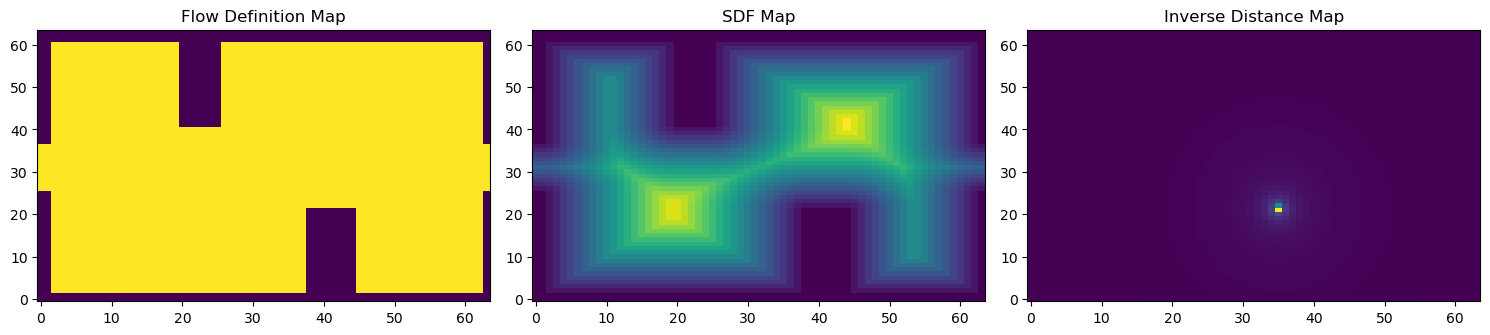

Sim13의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim13에 저장되었습니다.


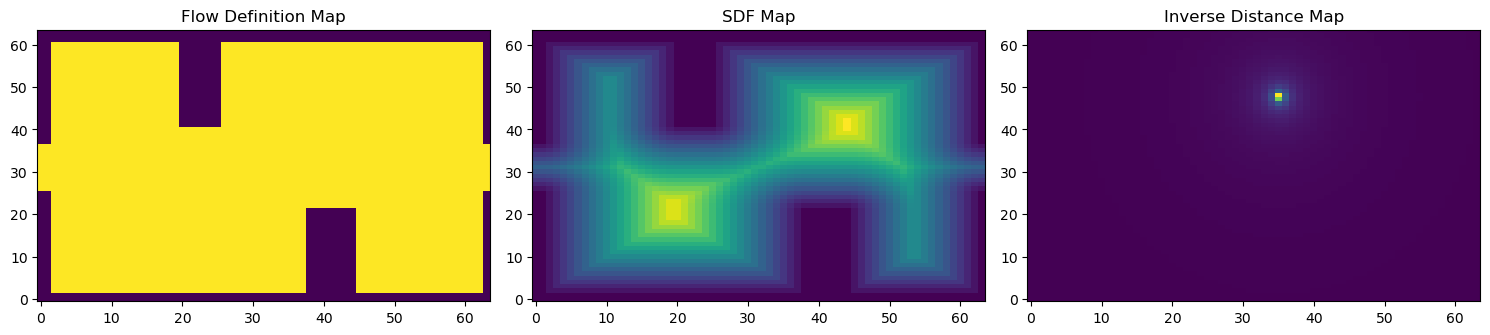

Sim14의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim14에 저장되었습니다.


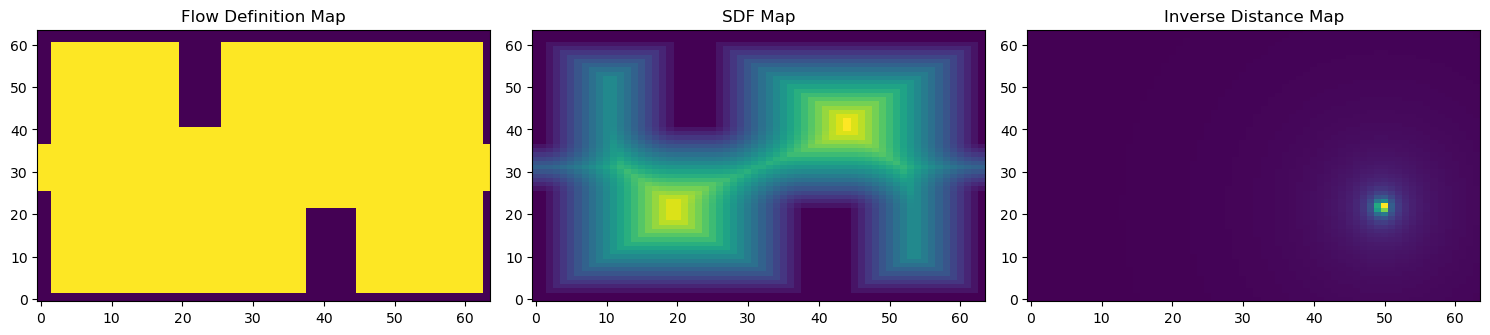

Sim15의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim15에 저장되었습니다.


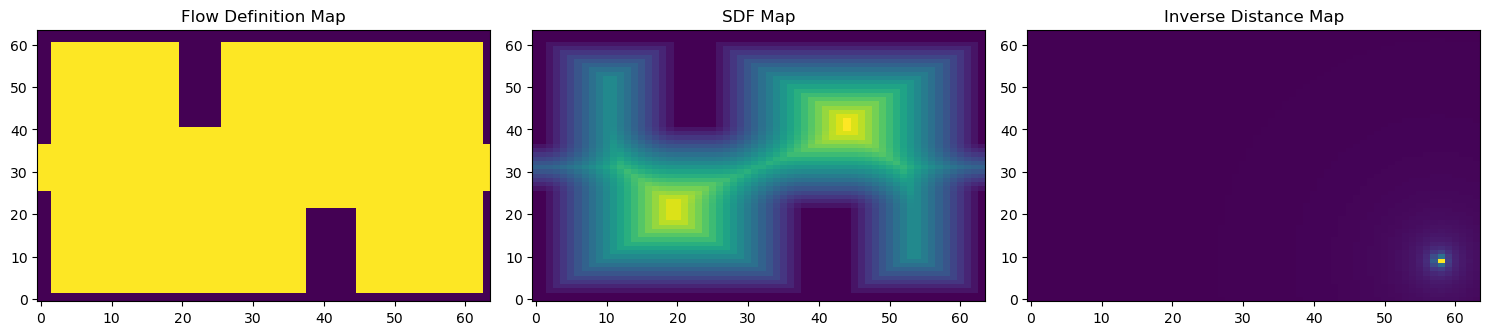

Sim16의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim16에 저장되었습니다.


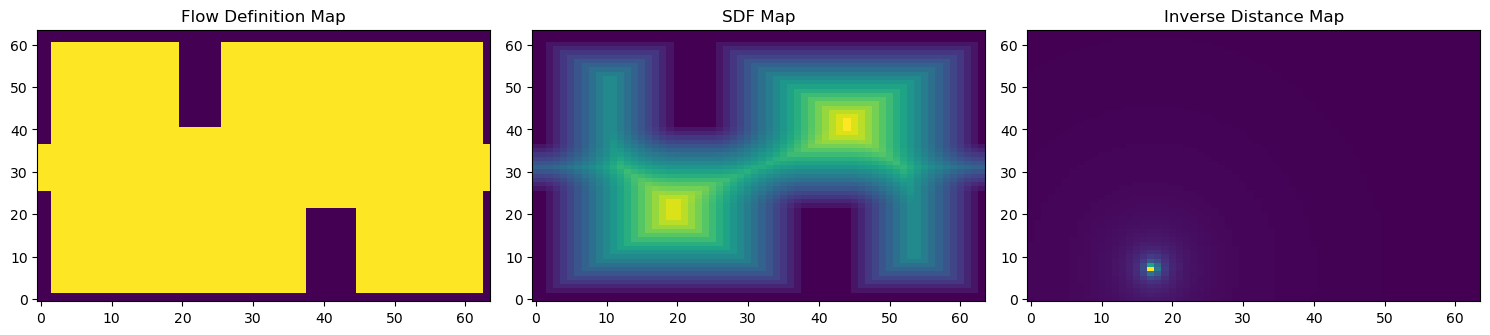

Sim17의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim17에 저장되었습니다.


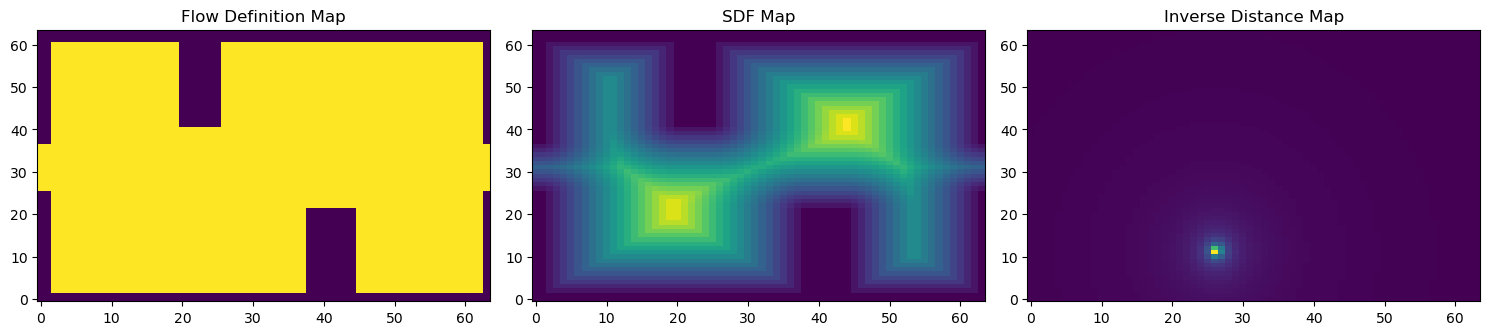

Sim18의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim18에 저장되었습니다.


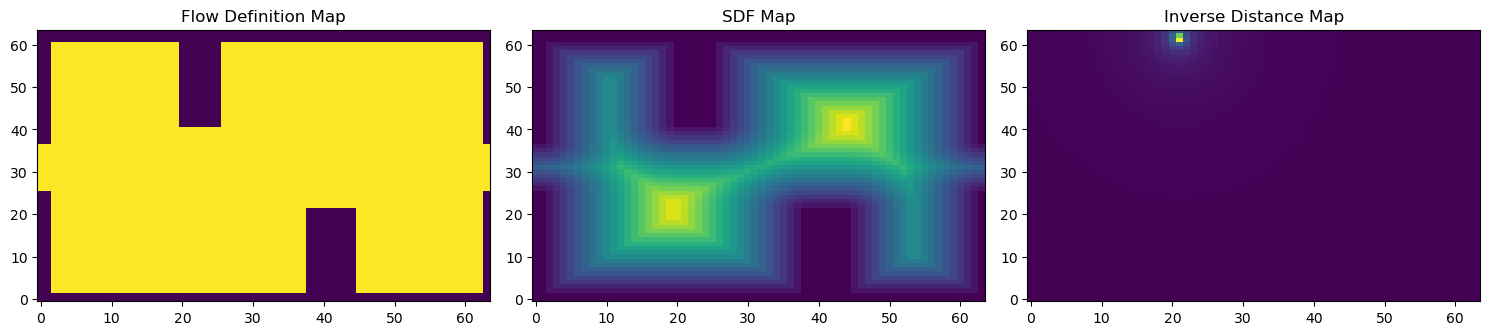

Sim19의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim19에 저장되었습니다.


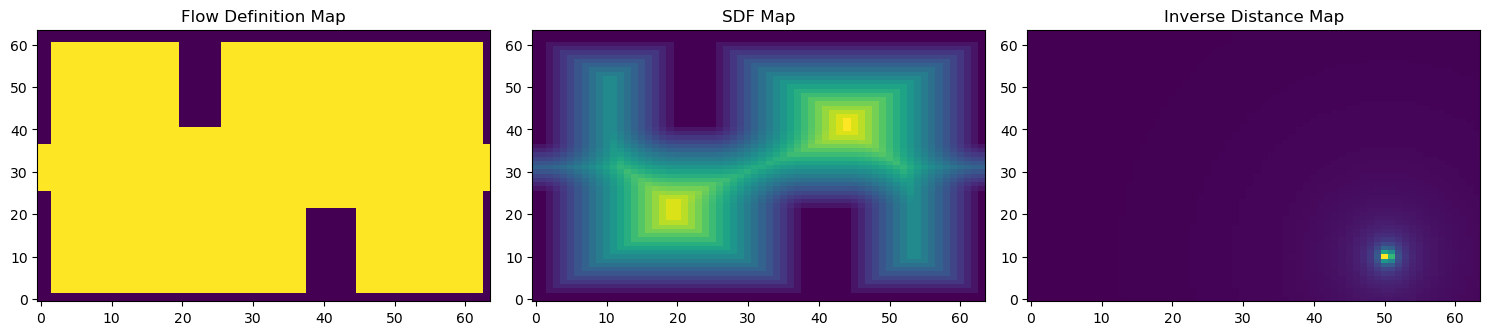

Sim20의 넘파이 파일이 /home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/sim20에 저장되었습니다.


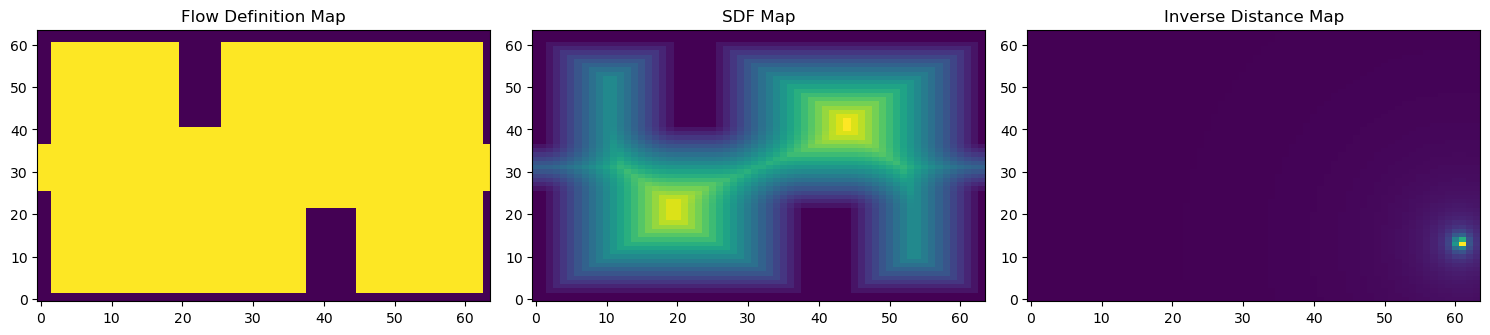

In [221]:
pgm_file_path = '/home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map95/occupancy.pgm'

# 자동화 처리
for sim_num, source_coords in enumerate(source_coords_list, start=1):
    process_and_visualize_maps(pgm_file_path, source_coords, sim_num)

In [ ]:
pgm_file_path = '/home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map96/occupancy.pgm'

# 자동화 처리
for sim_num, source_coords in enumerate(source_coords_list, start=1):
    process_and_visualize_maps(pgm_file_path, source_coords, sim_num)

In [ ]:
pgm_file_path = '/home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map97/occupancy.pgm'

# 자동화 처리
for sim_num, source_coords in enumerate(source_coords_list, start=1):
    process_and_visualize_maps(pgm_file_path, source_coords, sim_num)

In [ ]:
pgm_file_path = '/home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map98/occupancy.pgm'

# 자동화 처리
for sim_num, source_coords in enumerate(source_coords_list, start=1):
    process_and_visualize_maps(pgm_file_path, source_coords, sim_num)

In [225]:
pgm_file_path = '/home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map99/occupancy.pgm'

# 자동화 처리
for sim_num, source_coords in enumerate(source_coords_list, start=1):
    process_and_visualize_maps(pgm_file_path, source_coords, sim_num)

In [226]:
pgm_file_path = '/home/piai/PABA/gaden/install/test_env/share/test_env/scenarios/2_suc_map/map100/occupancy.pgm'

# 자동화 처리
for sim_num, source_coords in enumerate(source_coords_list, start=1):
    process_and_visualize_maps(pgm_file_path, source_coords, sim_num)